## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_125565_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (65295, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts  er   pac       lng  \
0      GCBZT02500A231213019  2024-06-05 11:15:00 NaN  2.73  114.2622   
1                       NaN                  NaN NaN   NaN       NaN   
2                       NaN                  NaN NaN   NaN       NaN   
3                       NaN                  NaN NaN   NaN       NaN   
4                       NaN                  NaN NaN   NaN       NaN   
...                     ...                  ...  ..   ...       ...   
65290  GCBZT02500A231213019  2025-05-10 19:05:00 NaN  0.02  114.2622   
65291  GCBZT02500A231213019  2025-05-10 19:10:00 NaN  0.00  114.2622   
65292  GCBZT02500A231213019  2025-05-10 19:15:00 NaN  0.00  114.2622   
65293  GCBZT02500A231213019  2025-05-10 19:20:00 NaN  0.00  114.2622   
65294  GCBZT02500A231213019  2025-05-10 19:25:00 NaN  0.00  114.2622   

             lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      30.231106     斜屋顶双坡   15.0         21.2093               74.5273  ...   
1            NaN       NaN    NaN         21.2700               74.1333  ...   
2            NaN       NaN    NaN         21.4398               73.9450  ...   
3            NaN       NaN    NaN         21.5581               73.6861  ...   
4            NaN       NaN    NaN         21.7098               73.4841  ...   
...          ...       ...    ...             ...                   ...  ...   
65290  30.231106     斜屋顶双坡   15.0             NaN                   NaN  ...   
65291  30.231106     斜屋顶双坡   15.0             NaN                   NaN  ...   
65292  30.231106     斜屋顶双坡   15.0         17.3608               64.8120  ...   
65293  30.231106     斜屋顶双坡   15.0             NaN                   NaN  ...   
65294  30.231106     斜屋顶双坡   15.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                       61.0289           299.3951          2.1579   
1                       72.2078           315.4137          2.0309   
2                       99.1130           330.0437          1.9199   
3                      139.3450           339.9624          1.8363   
4                      192.9039           345.1697          1.7750   
...                         ...                ...             ...   
65290                       NaN                NaN             NaN   
65291                       NaN                NaN             NaN   
65292                    0.0000             1.3814          1.9790   
65293                       NaN                NaN             NaN   
65294                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0              2.6490           2.7571             93.6188   
1              2.4724           2.5691             95.9636   
2              2.3189           2.4060             98.9683   
3              2.2006           2.2797            102.6356   
4              2.1109           2.1835            104.4221   
...               ...              ...                 ...   
65290             NaN              NaN                 NaN   
65291             NaN              NaN                 NaN   
65292          4.3540           5.0787            221.0234   
65293             NaN              NaN                 NaN   
65294             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                 93.6812              93.6945  2024-06-05 11:15:00   
1                 95.3432              95.0526  2024-06-05 11:30:00   
2                 97.7329              97.1692  2024-06-05 11:45:00   
3                101.0742             100.3663  2024-06-05 12:00:00   
4                102.8233             102.1001  2024-06-05 12:15:00   
...                   ...                  ...                  ...   
65290                 NaN                  NaN                  NaN   
65291                 NaN                  Na

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                    sn                   ts  er  \
0     2024-06-05 11:15:00  GCBZT02500A231213019  2024-06-05 11:15:00 NaN   
1     2024-06-05 11:20:00                   NaN                  NaN NaN   
2     2024-06-05 11:25:00                   NaN                  NaN NaN   
3     2024-06-05 11:30:00                   NaN                  NaN NaN   
4     2024-06-05 11:35:00                   NaN                  NaN NaN   
...                   ...                   ...                  ...  ..   
97726 2025-05-10 19:05:00  GCBZT02500A231213019  2025-05-10 19:05:00 NaN   
97727 2025-05-10 19:10:00  GCBZT02500A231213019  2025-05-10 19:10:00 NaN   
97728 2025-05-10 19:15:00  GCBZT02500A231213019  2025-05-10 19:15:00 NaN   
97729 2025-05-10 19:20:00  GCBZT02500A231213019  2025-05-10 19:20:00 NaN   
97730 2025-05-10 19:25:00  GCBZT02500A231213019  2025-05-10 19:25:00 NaN   

        pac       lng        lat roof_type  angle  temperature_2m  ...  \
0      2.73  114.2622  30.231106     斜屋顶双坡   15.0         21.2093  ...   
1       NaN       NaN        NaN       NaN    NaN             NaN  ...   
2       NaN       NaN        NaN       NaN    NaN             NaN  ...   
3       NaN       NaN        NaN       NaN    NaN         21.2700  ...   
4       NaN       NaN        NaN       NaN    NaN             NaN  ...   
...     ...       ...        ...       ...    ...             ...  ...   
97726  0.02  114.2622  30.231106     斜屋顶双坡   15.0             NaN  ...   
97727  0.00  114.2622  30.231106     斜屋顶双坡   15.0             NaN  ...   
97728  0.00  114.2622  30.231106     斜屋顶双坡   15.0         17.3608  ...   
97729  0.00  114.2622  30.231106     斜屋顶双坡   15.0             NaN  ...   
97730  0.00  114.2622  30.231106     斜屋顶双坡   15.0             NaN  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0               59.5616                   61.0289           299.3951   
1                   NaN                       NaN                NaN   
2                   NaN                       NaN                NaN   
3               70.9185                   72.2078           315.4137   
4                   NaN                       NaN                NaN   
...                 ...                       ...                ...   
97726               NaN                       NaN                NaN   
97727               NaN                       NaN                NaN   
97728            0.0000                    0.0000             1.3814   
97729               NaN                       NaN                NaN   
97730               NaN                       NaN                NaN   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0              2.1579          2.6490           2.7571             93.6188   
1                 NaN             NaN              NaN                 NaN   
2                 NaN             NaN              NaN                 NaN   
3              2.0309          2.4724           2.5691             95.9636   
4                 NaN             NaN              NaN                 NaN   
...               ...             ...              ...                 ...   
97726             NaN             NaN              NaN                 NaN   
97727             NaN             NaN              NaN                 NaN   
97728          1.9790          4.3540           5.0787            221.0234   
97729             NaN             NaN              NaN                 NaN   
97730             NaN             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  
0                 93.6812              93.6945  2024-06-05 11:15:00  
1                     NaN                  NaN                  NaN  
2                     NaN                  NaN                  NaN  
3                 95.3432              95.0526  2024-06-05 11:30:00  
4                     NaN                  NaN                

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        97554, 97555, 97556, 97557, 97558, 97559, 97560, 97561, 97562, 97563],
       dtype='int64', length=48630),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        97554, 97555, 97556, 97557, 97558, 97559, 97560, 97561, 97562, 97563],
       dtype='int64', length=48630),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(RangeIndex(start=0, stop=97731, step=1), True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        97554, 97555, 97556, 97557, 97558, 97559, 97560, 97561, 97562, 97563],
       dtype='int64', length=48630),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        97554, 97555, 97556, 97557, 97558, 97559, 97560, 97561, 97562, 97563],
       dtype='int64', length=48630),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([    1,     2,     4,     5,     7,     8,    10,    11,    13,    14,
        ...
        97717, 97718, 97720, 97721, 97723, 97724, 97726, 97727, 97729, 97730],
       dtype='int64', length=65154),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                    sn                   ts   er  \
0     2024-06-05 11:15:00  GCBZT02500A231213019  2024-06-05 11:15:00  0.0   
1     2024-06-05 11:20:00  GCBZT02500A231213019  2024-06-05 11:20:00  0.0   
2     2024-06-05 11:25:00  GCBZT02500A231213019  2024-06-05 11:25:00  0.0   
3     2024-06-05 11:30:00  GCBZT02500A231213019  2024-06-05 11:30:00  0.0   
4     2024-06-05 11:35:00  GCBZT02500A231213019  2024-06-05 11:35:00  0.0   
...                   ...                   ...                  ...  ...   
97726 2025-05-10 19:05:00  GCBZT02500A231213019  2025-05-10 19:05:00  0.0   
97727 2025-05-10 19:10:00  GCBZT02500A231213019  2025-05-10 19:10:00  0.0   
97728 2025-05-10 19:15:00  GCBZT02500A231213019  2025-05-10 19:15:00  0.0   
97729 2025-05-10 19:20:00  GCBZT02500A231213019  2025-05-10 19:20:00  0.0   
97730 2025-05-10 19:25:00  GCBZT02500A231213019  2025-05-10 19:25:00  0.0   

        pac       lng        lat roof_type  angle  temperature_2m  ...  \
0      2.73  114.2622  30.231106     斜屋顶双坡   15.0       21.209300  ...   
1      0.00  114.2622  30.231106     斜屋顶双坡   15.0       21.229533  ...   
2      0.00  114.2622  30.231106     斜屋顶双坡   15.0       21.249767  ...   
3      0.00  114.2622  30.231106     斜屋顶双坡   15.0       21.270000  ...   
4      0.00  114.2622  30.231106     斜屋顶双坡   15.0       21.326600  ...   
...     ...       ...        ...       ...    ...             ...  ...   
97726  0.02  114.2622  30.231106     斜屋顶双坡   15.0       17.580000  ...   
97727  0.00  114.2622  30.231106     斜屋顶双坡   15.0       17.470400  ...   
97728  0.00  114.2622  30.231106     斜屋顶双坡   15.0       17.360800  ...   
97729  0.00  114.2622  30.231106     斜屋顶双坡   15.0       17.360800  ...   
97730  0.00  114.2622  30.231106     斜屋顶双坡   15.0       17.360800  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0             59.561600                   61.0289         299.395100   
1             63.347233                   64.7552         304.734633   
2             67.132867                   68.4815         310.074167   
3             70.918500                   72.2078         315.413700   
4             79.597333                   81.1762         320.290367   
...                 ...                       ...                ...   
97726          0.000000                    0.0000           3.223267   
97727          0.000000                    0.0000           2.302333   
97728          0.000000                    0.0000           1.381400   
97729          0.000000                    0.0000           1.381400   
97730          0.000000                    0.0000           1.381400   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0            2.157900        2.649000         2.757100           93.618800   
1            2.115567        2.590133         2.694433           94.400400   
2            2.073233        2.531267         2.631767           95.182000   
3            2.030900        2.472400         2.569100           95.963600   
4            1.993900        2.421233         2.514733           96.965167   
...               ...             ...              ...                 ...   
97726        1.991800        4.318600         5.024033          221.880467   
97727        1.985400        4.336300         5.051367          221.451933   
97728        1.979000        4.354000         5.078700          221.023400   
97729        1.979000        4.354000         5.078700          221.023400   
97730        1.979000        4.354000         5.078700          221.023400   

       wind_direction_80m  wind_direction_120m        variable_date  
0               93.681200            93.694500  2024-06-05 11:15:00  
1               94.235200            94.147200                  NaN  
2               94.789200            94.599900                  NaN  
3               95.343200            95.052600  2024-06-05 11:30:00  
4               96.139767            95.758133    

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([], dtype='int64'), False)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=97731, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                    sn  \
ts                                                              
2024-06-05 11:15:00 2024-06-05 11:15:00  GCBZT02500A231213019   
2024-06-05 11:20:00 2024-06-05 11:20:00  GCBZT02500A231213019   
2024-06-05 11:25:00 2024-06-05 11:25:00  GCBZT02500A231213019   
2024-06-05 11:30:00 2024-06-05 11:30:00  GCBZT02500A231213019   
2024-06-05 11:35:00 2024-06-05 11:35:00  GCBZT02500A231213019   
...                                 ...                   ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  GCBZT02500A231213019   
2025-05-10 19:10:00 2025-05-10 19:10:00  GCBZT02500A231213019   
2025-05-10 19:15:00 2025-05-10 19:15:00  GCBZT02500A231213019   
2025-05-10 19:20:00 2025-05-10 19:20:00  GCBZT02500A231213019   
2025-05-10 19:25:00 2025-05-10 19:25:00  GCBZT02500A231213019   

                                     ts   er   pac       lng        lat  \
ts                                                                        
2024-06-05 11:15:00 2024-06-05 11:15:00  0.0  2.73  114.2622  30.231106   
2024-06-05 11:20:00 2024-06-05 11:20:00  0.0  0.00  114.2622  30.231106   
2024-06-05 11:25:00 2024-06-05 11:25:00  0.0  0.00  114.2622  30.231106   
2024-06-05 11:30:00 2024-06-05 11:30:00  0.0  0.00  114.2622  30.231106   
2024-06-05 11:35:00 2024-06-05 11:35:00  0.0  0.00  114.2622  30.231106   
...                                 ...  ...   ...       ...        ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.02  114.2622  30.231106   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  114.2622  30.231106   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  114.2622  30.231106   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  114.2622  30.231106   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.00  114.2622  30.231106   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-06-05 11:15:00     斜屋顶双坡   15.0       21.209300  ...         59.561600   
2024-06-05 11:20:00     斜屋顶双坡   15.0       21.229533  ...         63.347233   
2024-06-05 11:25:00     斜屋顶双坡   15.0       21.249767  ...         67.132867   
2024-06-05 11:30:00     斜屋顶双坡   15.0       21.270000  ...         70.918500   
2024-06-05 11:35:00     斜屋顶双坡   15.0       21.326600  ...         79.597333   
...                       ...    ...             ...  ...               ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       17.580000  ...          0.000000   
2025-05-10 19:10:00     斜屋顶双坡   15.0       17.470400  ...          0.000000   
2025-05-10 19:15:00     斜屋顶双坡   15.0       17.360800  ...          0.000000   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.360800  ...          0.000000   
2025-05-10 19:25:00     斜屋顶双坡   15.0       17.360800  ...          0.000000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-06-05 11:15:00                   61.0289         299.395100   
2024-06-05 11:20:00                   64.7552         304.734633   
2024-06-05 11:25:00                   68.4815         310.074167   
2024-06-05 11:30:00                   72.2078         315.413700   
2024-06-05 11:35:00                   81.1762         320.290367   
...                                       ...                ...   
2025-05-10 19:05:00                    0.0000           3.223267   
2025-05-10 19:10:00                    0.0000           2.302333   
2025-05-10 19:15:00                    0.0000           1.381400   
2025-05-10 19:20:00                    0.0000           1.381400   
2025-05-10 19:25:00                    0.0000           1.381400   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-06-05 11:15:00        2.157900        2.649000         2.757100   
2024-06-05 11:20:00        2.115567        2.590133         2.694433   
2024-06

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                    sn  \
2024-06-05 11:15:00 2024-06-05 11:15:00  GCBZT02500A231213019   
2024-06-05 11:20:00 2024-06-05 11:20:00  GCBZT02500A231213019   
2024-06-05 11:25:00 2024-06-05 11:25:00  GCBZT02500A231213019   
2024-06-05 11:30:00 2024-06-05 11:30:00  GCBZT02500A231213019   
2024-06-05 11:35:00 2024-06-05 11:35:00  GCBZT02500A231213019   
...                                 ...                   ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  GCBZT02500A231213019   
2025-05-10 19:10:00 2025-05-10 19:10:00  GCBZT02500A231213019   
2025-05-10 19:15:00 2025-05-10 19:15:00  GCBZT02500A231213019   
2025-05-10 19:20:00 2025-05-10 19:20:00  GCBZT02500A231213019   
2025-05-10 19:25:00 2025-05-10 19:25:00  GCBZT02500A231213019   

                                     ts   er   pac       lng        lat  \
2024-06-05 11:15:00 2024-06-05 11:15:00  0.0  2.73  114.2622  30.231106   
2024-06-05 11:20:00 2024-06-05 11:20:00  0.0  0.00  114.2622  30.231106   
2024-06-05 11:25:00 2024-06-05 11:25:00  0.0  0.00  114.2622  30.231106   
2024-06-05 11:30:00 2024-06-05 11:30:00  0.0  0.00  114.2622  30.231106   
2024-06-05 11:35:00 2024-06-05 11:35:00  0.0  0.00  114.2622  30.231106   
...                                 ...  ...   ...       ...        ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.02  114.2622  30.231106   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  114.2622  30.231106   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  114.2622  30.231106   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  114.2622  30.231106   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.00  114.2622  30.231106   

                    roof_type  angle  temperature_2m  ...  \
2024-06-05 11:15:00     斜屋顶双坡   15.0       21.209300  ...   
2024-06-05 11:20:00     斜屋顶双坡   15.0       21.229533  ...   
2024-06-05 11:25:00     斜屋顶双坡   15.0       21.249767  ...   
2024-06-05 11:30:00     斜屋顶双坡   15.0       21.270000  ...   
2024-06-05 11:35:00     斜屋顶双坡   15.0       21.326600  ...   
...                       ...    ...             ...  ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       17.580000  ...   
2025-05-10 19:10:00     斜屋顶双坡   15.0       17.470400  ...   
2025-05-10 19:15:00     斜屋顶双坡   15.0       17.360800  ...   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.360800  ...   
2025-05-10 19:25:00     斜屋顶双坡   15.0       17.360800  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-06-05 11:15:00                   61.0289         299.395100   
2024-06-05 11:20:00                   64.7552         304.734633   
2024-06-05 11:25:00                   68.4815         310.074167   
2024-06-05 11:30:00                   72.2078         315.413700   
2024-06-05 11:35:00                   81.1762         320.290367   
...                                       ...                ...   
2025-05-10 19:05:00                    0.0000           3.223267   
2025-05-10 19:10:00                    0.0000           2.302333   
2025-05-10 19:15:00                    0.0000           1.381400   
2025-05-10 19:20:00                    0.0000           1.381400   
2025-05-10 19:25:00                    0.0000           1.381400   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-06-05 11:15:00        2.157900        2.649000         2.757100   
2024-06-05 11:20:00        2.115567        2.590133         2.694433   
2024-06-05 11:25:00        2.073233        2.531267         2.631767   
2024-06-05 11:30:00        2.030900        2.472400         2.569100   
2024-06-05 11:35:00        1.993900        2.421233         2.514733   
...                             ...             ...              ...   
2025-05-10 19:05:00        1.991800        4.318600         5.024033   
2025-05-10 19:10:00        1.985400        4.336300         5.051367   
2025-05-10 19:15:00        1.979000        4.354000         5.078700   
2025-05-10 19:20:00        1.979000        4.354000         5.078700   
2025-0

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex([], dtype='datetime64[ns]', freq='5min'), False)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(97731, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    18.427553
1        relative_humidity_2m    69.195440
2                dew_point_2m    12.193150
3                pressure_msl  1015.617489
4            surface_pressure  1010.748003
5   precipitation_probability    11.787837
6                 cloud_cover    56.274573
7             cloud_cover_low    12.885264
8             cloud_cover_mid    30.730098
9            cloud_cover_high    35.573696
10        shortwave_radiation   164.483099
11           direct_radiation    94.281707
12   direct_normal_irradiance   148.180769
13          diffuse_radiation    70.201392
14             wind_speed_10m     2.562428
15             wind_speed_80m     4.195680
16            wind_speed_120m     4.650519
17         wind_direction_10m   141.116580
18         wind_direction_80m   141.884544
19        wind_direction_120m   141.955853
20                   pac_copy     2.677941

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     97.965353
1        relative_humidity_2m    338.215986
2                dew_point_2m    105.924990
3                pressure_msl    109.498957
4            surface_pressure    105.453695
5   precipitation_probability    879.067681
6                 cloud_cover   1800.157375
7             cloud_cover_low    781.199461
8             cloud_cover_mid   1592.661251
9            cloud_cover_high   1721.842144
10        shortwave_radiation  55982.221369
11           direct_radiation  27695.470975
12   direct_normal_irradiance  51752.787078
13          diffuse_radiation   8086.745681
14             wind_speed_10m      2.073312
15             wind_speed_80m      4.395406
16            wind_speed_120m      5.302220
17         wind_direction_10m   9849.553097
18         wind_direction_80m   9598.447705
19        wind_direction_120m   9515.887146
20                   pac_copy     19.200745

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            9.897745
1        relative_humidity_2m           18.390649
2                dew_point_2m           10.291987
3                pressure_msl           10.464175
4            surface_pressure           10.269065
5   precipitation_probability           29.649076
6                 cloud_cover           42.428262
7             cloud_cover_low           27.949946
8             cloud_cover_mid           39.908160
9            cloud_cover_high           41.495086
10        shortwave_radiation          236.605624
11           direct_radiation          166.419563
12   direct_normal_irradiance          227.492389
13          diffuse_radiation           89.926335
14             wind_speed_10m            1.439900
15             wind_speed_80m            2.096522
16            wind_speed_120m            2.302655
17         wind_direction_10m           99.244915
18         wind_direction_80m           97.971668
19        wind_direction_120m           97.549409
20                   pac_copy            4.381866

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    39.1455
1        relative_humidity_2m    99.9394
2                dew_point_2m    27.9066
3                pressure_msl  1040.8709
4            surface_pressure  1035.6224
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   898.0712
11           direct_radiation   736.8413
12   direct_normal_irradiance   790.5842
13          diffuse_radiation   400.4993
14             wind_speed_10m    10.1411
15             wind_speed_80m    15.4495
16            wind_speed_120m    16.7713
17         wind_direction_10m   358.3642
18         wind_direction_80m   358.3874
19        wind_direction_120m   358.1824
20                   pac_copy    22.2600

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m    -4.0242
1        relative_humidity_2m    14.8551
2                dew_point_2m   -17.2565
3                pressure_msl   991.4371
4            surface_pressure   986.9251
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.0652
15             wind_speed_80m     0.2129
16            wind_speed_120m     0.2682
17         wind_direction_10m     1.9077
18         wind_direction_80m     1.1972
19        wind_direction_120m     1.7198
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    19.057100
1        relative_humidity_2m    71.302700
2                dew_point_2m    12.988800
3                pressure_msl  1016.182700
4            surface_pressure  1011.315300
5   precipitation_probability     0.000000
6                 cloud_cover    69.978233
7             cloud_cover_low     0.006300
8             cloud_cover_mid     5.582500
9            cloud_cover_high     8.363733
10        shortwave_radiation    14.843733
11           direct_radiation     0.818533
12   direct_normal_irradiance     3.564700
13          diffuse_radiation    11.637233
14             wind_speed_10m     2.233933
15             wind_speed_80m     3.933400
16            wind_speed_120m     4.390833
17         wind_direction_10m   114.855500
18         wind_direction_80m   118.091467
19        wind_direction_120m   118.738167
20                   pac_copy     0.000000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       12.644956             61.162400      6.513111   1008.653811   
0.666667       24.529367             79.913078     19.105944   1021.969111   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1003.947778                        0.0    18.482533   
0.666667       1016.969300                        0.0    97.817356   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         0.000000         0.077767            0.0043  ...   
0.666667         2.434956        31.353567           57.6091  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                  0.000000           0.000000   
0.666667         36.428778                101.753822          99.763822   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        1.791078        3.035622         3.366689           78.894311   
0.666667        2.870078        4.913000         5.520633          191.211867   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           82.025511            82.607989      0.00  
0.666667          193.172656           194.056111      1.83  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000             -0.059736      0.898409   
relative_humidity_2m            -0.059736              1.000000      0.378639   
dew_point_2m                     0.898409              0.378639      1.000000   
pressure_msl                    -0.878163             -0.204793     -0.900027   
surface_pressure                -0.874449             -0.208582     -0.898230   
precipitation_probability        0.048762              0.331019      0.179639   
cloud_cover                      0.022583              0.145625      0.085194   
cloud_cover_low                 -0.090142              0.293121      0.037071   
cloud_cover_mid                 -0.227995              0.123915     -0.155334   
cloud_cover_high                 0.247337              0.103142      0.271621   
shortwave_radiation              0.364696             -0.455819      0.131865   
direct_radiation                 0.345944             -0.451778      0.114069   
direct_normal_irradiance         0.289951             -0.487684      0.044126   
diffuse_radiation                0.319342             -0.363238      0.135853   
wind_speed_10m                   0.221520             -0.220242      0.110886   
wind_speed_80m                   0.100341             -0.087456      0.061389   
wind_speed_120m                  0.070292             -0.056475      0.048003   
wind_direction_10m               0.069304              0.102423      0.099847   
wind_direction_80m               0.080850              0.098889      0.109176   
wind_direction_120m              0.083520              0.097800      0.110881   
pac_copy                         0.375086             -0.507121      0.114597   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.878163         -0.874449   
relative_humidity_2m          -0.204793         -0.208582   
dew_point_2m                  -0.900027         -0.898230   
pressure_msl                   1.000000          0.999970   
surface_pressure               0.999970          1.000000   
precipitation_probability     -0.156067         -0.157448   
cloud_cover                   -0.078417         -0.079070   
cloud_cover_low                0.028723          0.027748   
cloud_cover_mid                0.169224          0.168057   
cloud_cover_high              -0.298871         -0.299065   
shortwave_radiation           -0.134937         -0.131057   
direct_radiation              -0.121155         -0.117405   
direct_normal_irradiance      -0.061575         -0.057868   
diffuse_radiation             -0.130822         -0.127552   
wind_speed_10m                -0.129696         -0.127977   
wind_speed_80m                -0.092803         -0.092507   
wind_speed_120m               -0.082033         -0.082067   
wind_direction_10m            -0.126860         -0.127552   
wind_direction_80m            -0.149125         -0.149939   
wind_direction_120m           -0.153700         -0.154536   
pac_copy                      -0.144072         -0.140168   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.048762     0.022583   
relative_humidity_2m                        0.331019     0.145625   
dew_point_2m                                0.179639     0.085194   
pressure_msl                               -0.156067    -0.078417   
surface_pressure                           -0.157448    -0.079070   
precipitation_probability                   1.000000     0.339277   
cloud_cover                                 0.339277     1.000000   
cloud_cover_low                             0.410826     0.372792   
cloud_cover_mid                             0.417753     0.641435   
cloud_cover_high                            0.232341     0.678349   
shortwave_radiation                        -0.065023    -0.124757   
direct_radiation                           -0.112056    -0.241655   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.870988
1        relative_humidity_2m          0.171971
2                dew_point_2m          0.973410
3                pressure_msl          0.973531
4            surface_pressure          0.973356
5   precipitation_probability          0.384908
6                 cloud_cover          0.545972
7             cloud_cover_low          0.568909
8             cloud_cover_mid          0.575676
9            cloud_cover_high          0.518539
10        shortwave_radiation         -0.337807
11           direct_radiation         -0.236024
12   direct_normal_irradiance         -0.212942
13          diffuse_radiation         -0.378295
14             wind_speed_10m          0.553550
15             wind_speed_80m          0.581400
16            wind_speed_120m          0.552791
17         wind_direction_10m          0.391682
18         wind_direction_80m          0.427975
19        wind_direction_120m          0.438602
20                   pac_copy         -0.276570

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([ 78382.93239331, 171278.51577663,  89995.89947221]),
 'fft_periods': array([289, 288, 143])}

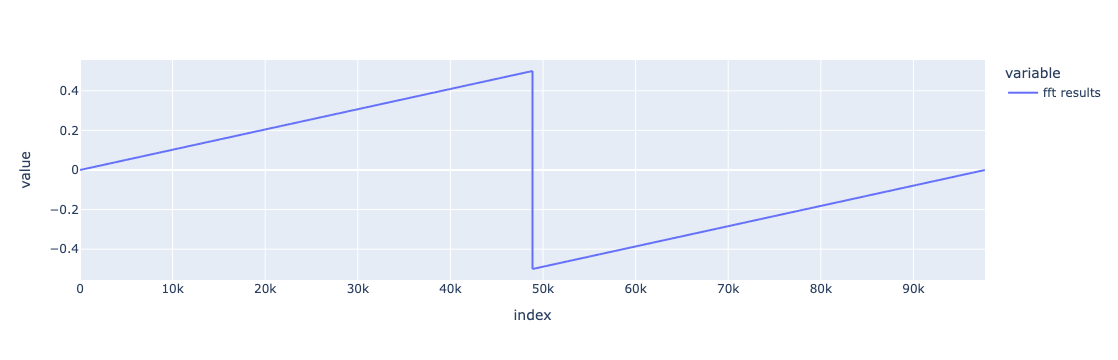

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -34.12101001898693,
  'P-value': 0.0,
  'Lags': np.int64(63),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -34.121
  P-value                         0.000
  Lags                               63
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-41.401842274014356),
  'P-value': 0.0,
  'Lags': 68,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -41.402
  P-value                         0.000
  Lags                               68
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -34.11651145734435,
  'P-value': 0.0,
  'Lags': np.int64(63),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -34.117
  P-value                         0.000
  Lags                               63
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}